<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Economia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

*   **pandas:** Manipulação e análise de dados.
*   **numpy:** Cálculo numérico com arrays e matrizes.
*   **matplotlib.pyplot:** Criação de gráficos.
*   **seaborn:** Visualização estatística baseada no Matplotlib.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.frequent_patterns import apriori, association_rules
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



---



# Preparação dos dados
Leitura de um arquivo CSV hospedado no GitHub e armazenamento dos dados em um DataFrame chamado "df" usando a biblioteca "pandas".
O separador de colunas é definido como ponto e virgula ";" e o parâmetro "low_memory=False" garante uma leitura mais precisa dos tipos de dados.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ";", low_memory=False)
df

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5.932,854,537,13.692,111.190,252.0,38.0,38.0,...,NaN,"25.511.889,220","18.911.068,400","1.665.392,540",80.0,0.0,"32,065",SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27.505,5.680,4.778,104.977,554.663,671.0,3.0,3.0,...,"1.777.256,000","63.002.672,933","45.304.154,440","538.882,600",299.0,3.0,"55,065",MG,Elói Mendes,Sudeste
2,2016,3552007,6.193,668,580,12.519,62.441,83.0,0.0,0.0,...,NaN,"30.492.825,449","21.861.157,950","1.048.458,040",59.0,2.0,"14,930",SP,Silveiras,Sudeste
3,2016,3305604,21.279,3.087,2.669,80.161,403.121,290.0,0.0,0.0,...,NaN,"140.538.926,872","100.508.822,360","871.234,340",272.0,2.0,"22,698",RJ,Silva Jardim,Sudeste
4,2016,1717008,4.534,212,183,5.309,48.551,34.0,94.0,34.0,...,NaN,"15.541.375,953","13.178.989,760","8.037,870",43.0,1.0,"2,908",TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7.171,463,436,10.502,NaN,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,135.0,3.0,"83,287",AL,Monteirópolis,Nordeste
33416,2021,1600105,9.265,428,383,9.932,NaN,38.0,0.0,0.0,...,NaN,NaN,NaN,NaN,160.0,2.0,"1,010",AP,Amapá,Norte
33417,2019,2605459,3.061,2.210,1.773,43.093,192.775,289.0,0.0,0.0,...,NaN,NaN,NaN,NaN,32.0,1.0,"180,059",PE,Fernando de Noronha,Nordeste
33418,2020,1503002,7.070,538,514,12.207,63.579,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,149.0,4.0,"0,601",PA,Faro,Norte




---



Esses comandos são fundamentais para padronizar e limpar os dados, garantindo que todos os valores estejam no formato correto para análise. Eles corrigem inconsistências, como separar casas de milhar, formatos decimais diferentes e valores ausentes representados como "nan". Essa padronização evita erros em cálculos, comparações e visualizações, além de permitir que os dados sejam tratados  de forma uniformeao longo do projeto.

In [3]:
warnings.filterwarnings("ignore")
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que é string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que é string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

df

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,380,380,...,0,25511889.220,18911068.400,1665392.540,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,30,30,...,1777256.000,63002672.933,45304154.440,538882.600,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,00,00,...,0,30492825.449,21861157.950,1048458.040,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,00,00,...,0,140538926.872,100508822.360,871234.340,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,940,340,...,0,15541375.953,13178989.760,8037.870,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,00,00,...,0,0,0,0,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,00,00,...,0,0,0,0,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,00,00,...,0,0,0,0,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,00,00,...,0,0,0,0,1490,40,0.601,PA,Faro,Norte




---



Converção explicita dos tipos dos dados das colunas para tipos mais apropriados ao seu conteúdo. Colunas numéricas que representam contagens ou valores inteiros, como população, número de empresas ou PIB, foram convertidas para o tipo "int". Colunas que contêm valores monetários ou proporções, como receitas ou povoamento, foram convertidas para o tipo "float". Já a coluna CDMunicipio, por ser um identificadorque pode conter zeros à esquerda, foi convertido para "str". Isso assegura que os dados estejam no formato correto para análise, visualizações e operações matemáticas.

In [4]:
#Momentaniamente não utilizada
df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)
df.dtypes


,0
Ano,int64
CDMunicipio,object
Populacao,int64
PessoalOcupado,int64
PessoalAssalariado,int64
VrSalarios,int64
PIB,int64
QtEmpresas,int64
AreaPlantada_h,int64
AreaColhida_h,int64




---



Implementada com o intuito de remover colunas irrelevantes ou desnecessárias do conjunto de dados, sem causar erros. Isso contribui para manter o DataFrame mais limpo, enxuto e focado apenas nas variáveis úteis para as análises do projeto.

In [5]:
columns_to_drop = ['AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'VlProducaoPecuaria']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]


df = df.drop(columns=existing_columns_to_drop)
df


,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,Area,Importacoes_US$,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,185.0,40.0,0.0,2.551189e+07,1.891107e+07,1665392.54,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,499.5,60.0,1777256.0,6.300267e+07,4.530415e+07,538882.60,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,414.8,70.0,0.0,3.049283e+07,2.186116e+07,1048458.04,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,937.5,97.0,0.0,1.405389e+08,1.005088e+08,871234.34,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,1559.1,107.0,0.0,1.554138e+07,1.317899e+07,8037.87,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,86.1,0.0,0.0,0.000000e+00,0.000000e+00,0.00,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,9175.9,0.0,0.0,0.000000e+00,0.000000e+00,0.00,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,17.0,0.0,0.0,0.000000e+00,0.000000e+00,0.00,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,11770.6,0.0,0.0,0.000000e+00,0.000000e+00,0.00,1490,40,0.601,PA,Faro,Norte





---




#Defininição de funções
Neste tópico são definidas funções úteis para análise dos dados.

In [45]:
def preparar_dados(df, col_x, col_y, filtro_x=None):
    dados = df[[col_x, col_y]].dropna().copy()
    dados[col_x] = pd.to_numeric(dados[col_x], errors='coerce')
    dados[col_y] = pd.to_numeric(dados[col_y], errors='coerce')
    dados = dados.dropna().astype(int)

    if filtro_x:
        dados = dados[(dados[col_x] >= filtro_x[0]) & (dados[col_x] <= filtro_x[1])]

    return dados[col_x], dados[col_y]

def plot_scatter_with_regression(ax, x, y, title, xlabel, ylabel):
    # Ajuste da regressão
    X = np.array(x).reshape(-1, 1)
    Y = np.array(y)
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    r2 = r2_score(Y, Y_pred)

    a = model.coef_[0]
    b = model.intercept_

    # Plot dos dados e da regressão
    ax.scatter(X, Y, color='royalblue', alpha=0.6, label="Dados")
    ax.plot(X, Y_pred, color='red', label="Regressão Linear")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(False)
    ax.legend()

    # Texto com os parâmetros no gráfico (posição relativa no canto inferior direito)
    textstr = f"a = {a:.2f}\nb = {b:.2f}\n$R^2$ = {r2:.2f}"
    ax.text(0.95, 0.05, textstr, transform=ax.transAxes,
            fontsize=10, verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Pergunta 1

**Existe uma correlação entre a quantidade de empresas (QtEmpresas) e indicadores sociais (População, NrNascimento, NrObitosInfantis)?**

Para começar a buscar uma resposta, inicialmente será plotado os gráficos sobre cada um dos indicadores sociais (eixo Y) pela quantidade de empresas (eixo X).



## Quantidade de empresas e nascimenos

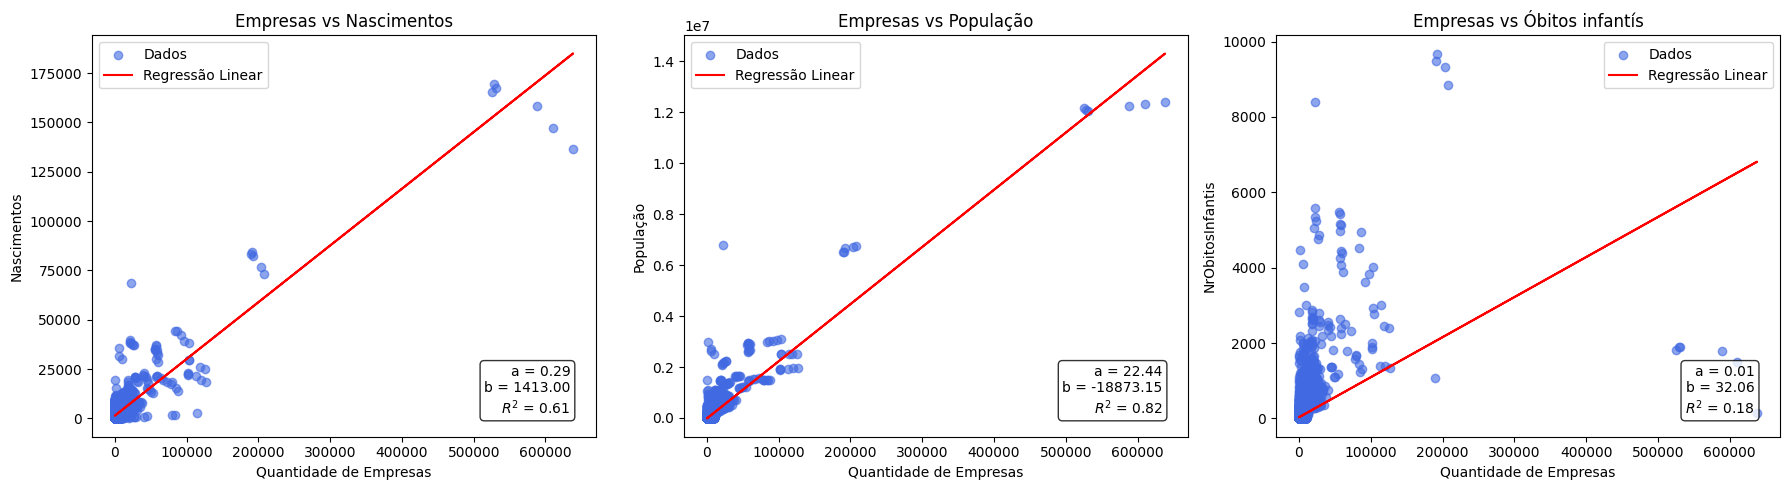

In [46]:
# Preparar os dados para os três gráficos
x1, y1 = preparar_dados(df, 'QtEmpresas', 'NrNascimentos')
x2, y2 = preparar_dados(df, 'QtEmpresas', 'Populacao')
x3, y3 = preparar_dados(df, 'QtEmpresas', 'NrObitosInfantis')

# Criar os três gráficos lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_scatter_with_regression(axs[0], x1, y1, "Empresas vs Nascimentos", "Quantidade de Empresas", "Nascimentos")
plot_scatter_with_regression(axs[1], x2, y2, "Empresas vs População", "Quantidade de Empresas", "População")
plot_scatter_with_regression(axs[2], x3, y3, "Empresas vs Óbitos infantís", "Quantidade de Empresas", "NrObitosInfantis")

plt.tight_layout()
plt.show()

Observando o gráfico resultante da Quantidade de empresas e Número de nascimentos, podemos observar que existem 3 agrupamentos principais de dados, sendo o primeiro com o número de empresas abaixo dos 150.000, o segundo com a quantidade de empresas entre 150.000 e 300000, e por fim o com a quantidade de empresas acima dos 500.000. Com isso para aprofuindar a análise, realizaremos a contagem de quantas amostras pertencem a cada um dos grupos identificados.

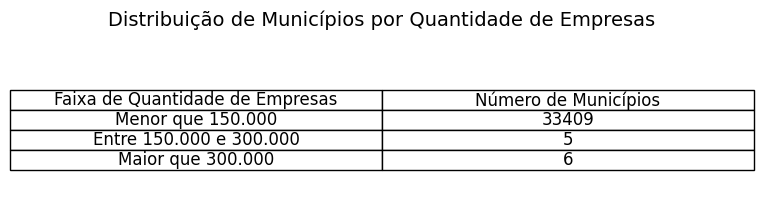

In [10]:
df_filtrado = df[['QtEmpresas']].copy()
df_filtrado['QtEmpresas'] = pd.to_numeric(df_filtrado['QtEmpresas'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

menor_150k = df_filtrado[df_filtrado['QtEmpresas'] < 150000].shape[0]
entre_150k_300k = df_filtrado[(df_filtrado['QtEmpresas'] >= 150000) & (df_filtrado['QtEmpresas'] <= 300000)].shape[0]
maior_300k = df_filtrado[df_filtrado['QtEmpresas'] > 300000].shape[0]

tabela_empresas = pd.DataFrame({
    'Faixa de Quantidade de Empresas': [
        'Menor que 150.000',
        'Entre 150.000 e 300.000',
        'Maior que 300.000'
    ],
    'Número de Municípios': [
        menor_150k,
        entre_150k_300k,
        maior_300k
    ]
})


fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')


tabela = ax.table(
    cellText=tabela_empresas.values,
    colLabels=tabela_empresas.columns,
    cellLoc='center',
    loc='center'
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.scale(1.2, 1.2)

plt.title('Distribuição de Municípios por Quantidade de Empresas', fontsize=14, pad=20)
plt.show()

Após realizarmos a contagem da população de cada subgrupo, resultando em 33.409 para o primeiro, 5 para o segundo e 6 para o terceiro, fica evidente que na verdade os últimos dois subgrupos se tratam de outliers, sendo assim necessário os desconsiderar para uma análise mais acertiva. Deste modo foi produzido uma relação em que a quantidade de empresas foi limitada a 150.000.

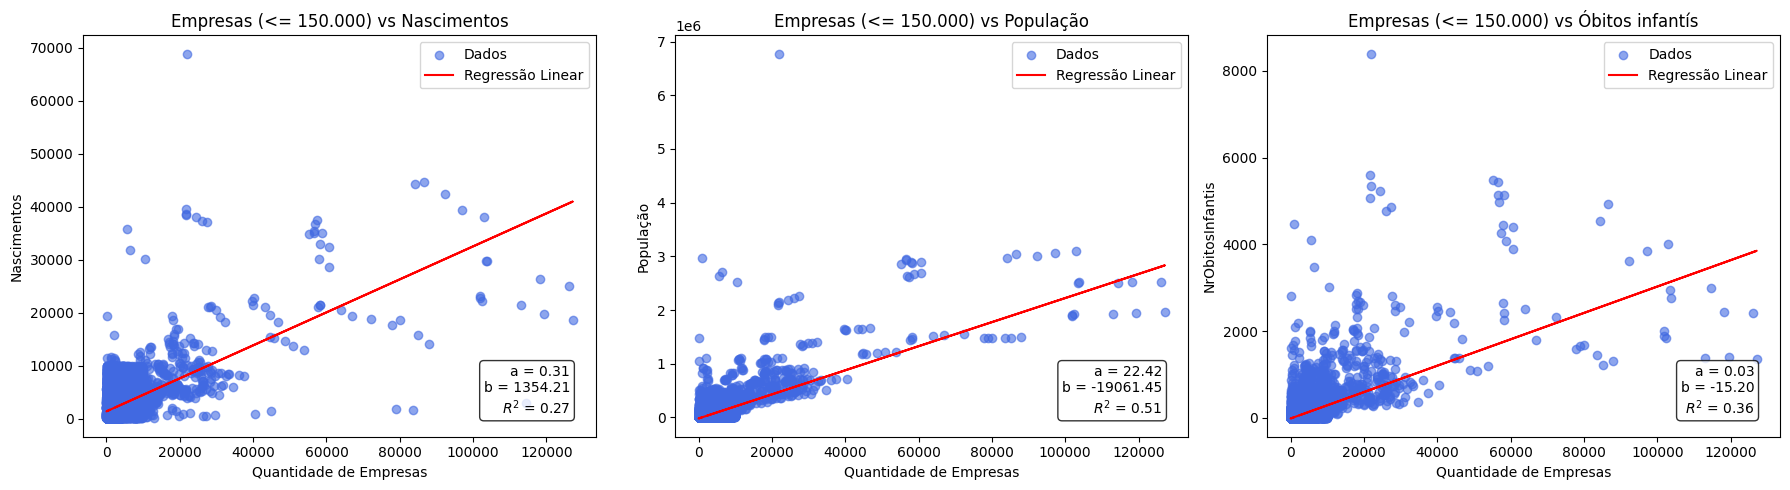

In [11]:
# Preparar os dados para os três gráficos
x1, y1 = preparar_dados(df, 'QtEmpresas', 'NrNascimentos', filtro_x=(0, 150000))
x2, y2 = preparar_dados(df, 'QtEmpresas', 'Populacao', filtro_x=(0, 150000))
x3, y3 = preparar_dados(df, 'QtEmpresas', 'NrObitosInfantis', filtro_x=(0, 150000))

# Criar os três gráficos lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_scatter_with_regression(axs[0], x1, y1, "Empresas (<= 150.000) vs Nascimentos", "Quantidade de Empresas", "Nascimentos")
plot_scatter_with_regression(axs[1], x2, y2, "Empresas (<= 150.000) vs População", "Quantidade de Empresas", "População")
plot_scatter_with_regression(axs[2], x3, y3, "Empresas (<= 150.000) vs Óbitos infantís", "Quantidade de Empresas", "NrObitosInfantis")

plt.tight_layout()
plt.show()

Após a exclusão dos outliers, podemos observar que a disperção que antes parecia de certa forma crescente, na verdade em sua maioria é irregular, dando a concluir que não existe uma correlação entre os fatores.

### Regra de associação
Inicialmente, para realizar as regras de associaçãoentre os dados, faremos alguns preparativos. Começaremos Definindo a função principal que analisa a associação entre dois grupos de variáveis, definida como "analyze_associations". *Texto em itálico*

In [12]:
def analyze_associations(data, group1_cols, group2_cols, group1_name, group2_name, min_support=0.01, min_confidence=0.5):

    # Selecionar apenas as colunas relevantes
    selected_cols = group1_cols + group2_cols
    filtered_data = data[selected_cols]

    # Encontrar os itemsets frequentes
    frequent_itemsets = apriori(filtered_data, min_support=min_support, use_colnames=True)

    if len(frequent_itemsets) == 0:
        print(f"Nenhum itemset frequente encontrado. Tente reduzir o min_support (atual: {min_support}).")
        return None

    # Gerar regras de associação
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    if len(rules) == 0:
        print(f"Nenhuma regra encontrada. Tente reduzir min_confidence (atual: {min_confidence}) ou min_support.")
        return None

    # Filtrar apenas regras onde o antecedente é do grupo1 e o consequente é do grupo2
    filtered_rules = []

    for _, rule in rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])

        # Verificar se todos os antecedentes são do grupo1
        if all(ant in group1_cols for ant in antecedents):
            # Verificar se todos os consequentes são do grupo2
            if all(cons in group2_cols for cons in consequents):
                filtered_rules.append(rule)

    # Converter para DataFrame
    result_rules = pd.DataFrame(filtered_rules)

    if len(result_rules) == 0:
        print(f"Nenhuma regra encontrada onde {group1_name} → {group2_name}.")
        return None

    # Ordenar por lift
    result_rules = result_rules.sort_values('lift', ascending=False)

    for _, rule in result_rules.head(10).iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])

    return result_rules

Além desta função, outra função importante também será definida a qual fica encarregada de mostrar de forma ordenada as 3 melhores regras de cada conjunto. a qual fica denominada "show_top_rules".

In [13]:
def show_top_rules(rules_df, group1_name, group2_name):
    if rules_df is None or len(rules_df) == 0:
        print(f"Nenhuma regra encontrada entre {group1_name} e {group2_name}.")
        return

    print(f"\nTop 3 regras entre {group1_name} e {group2_name} (por lift):")
    for i, (_, rule) in enumerate(rules_df.head(3).iterrows(), 1):
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        print(f"{i}. {[a.replace(f'{group1_name}_', '') for a in antecedents]} => "
              f"{[c.replace(f'{group2_name}_', '') for c in consequents]}")
        print(f"   Lift: {rule['lift']:.4f}, Confidence: {rule['confidence']:.4f}, Support: {rule['support']:.4f}")

Com as funções que usaremos ja definidas, faremos o tratamento dos dados da forma necessária para utilizarmos o algoritmo Apriori. No código a seguir, filtraremos os dados para utilizarmos apenas valores existentes e acima de 0, depois serão separados em 3 categorias, Baixa, Média e Alta, utilizando como critério o tercíl de cada dado. Por fim será feita a tabela de variáveis binárias dos dados.

In [14]:
# Remove valores NaN e valores menores ou iguais a zero nas colunas relevantes
df_filtrado = df[
    (df['QtEmpresas'] > 0) &
    (df['Populacao'] > 0) &
    (df['NrNascimentos'] > 0) &
    (df['NrObitosInfantis'] > 0)
].dropna(subset=['QtEmpresas', 'Populacao', 'NrNascimentos', 'NrObitosInfantis']).copy()

# Aplica a categorização em tercis
df_filtrado['Faixa_Empresas'] = pd.qcut(df_filtrado['QtEmpresas'], q=3, labels=['Baixa', 'Média', 'Alta'])
df_filtrado['Faixa_Populacao'] = pd.qcut(df_filtrado['Populacao'], q=3, labels=['Baixa', 'Média', 'Alta'])
df_filtrado['Faixa_Nascimentos'] = pd.qcut(df_filtrado['NrNascimentos'], q=3, labels=['Baixo', 'Médio', 'Alto'])
df_filtrado['Faixa_ObitosInfantis'] = pd.qcut(df_filtrado['NrObitosInfantis'], q=3, labels=['Baixo', 'Médio', 'Alto'])
df_filtrado

# Gera tabela de variáveis binárias
dados_binarios = pd.get_dummies(df_filtrado[['Faixa_Empresas','Faixa_Populacao','Faixa_Nascimentos','Faixa_ObitosInfantis']],dtype=bool)

# Identificar colunas de cada categoria
empresa_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_Empresas_')]
populacao_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_Populacao_')]
nascimentos_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_Nascimentos_')]
obitos_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_ObitosInfantis_')]

dados_binarios

,Faixa_Empresas_Baixa,Faixa_Empresas_Média,Faixa_Empresas_Alta,Faixa_Populacao_Baixa,Faixa_Populacao_Média,Faixa_Populacao_Alta,Faixa_Nascimentos_Baixo,Faixa_Nascimentos_Médio,Faixa_Nascimentos_Alto,Faixa_ObitosInfantis_Baixo,Faixa_ObitosInfantis_Médio,Faixa_ObitosInfantis_Alto
1,False,False,True,False,False,True,False,False,True,False,True,False
2,True,False,False,True,False,False,True,False,False,True,False,False
3,False,False,True,False,True,False,False,True,False,True,False,False
4,True,False,False,True,False,False,True,False,False,True,False,False
5,False,False,True,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
33415,True,False,False,True,False,False,False,True,False,False,True,False
33416,True,False,False,True,False,False,False,True,False,True,False,False
33417,False,False,True,True,False,False,True,False,False,True,False,False
33418,True,False,False,True,False,False,False,True,False,False,True,False


Com os dados e funções preparados, começaremos a realizar as análises para tentar responder melhor a pergunta desejada.

In [15]:
# Definir parâmetros
min_support = 0.1
min_confidence = 0.3

empresas_nascimentos_rules = analyze_associations(
    dados_binarios,
    empresa_columns,
    nascimentos_columns,
    'Faixa_Empresas',
    'Faixa_Nascimentos',
    min_support,
    min_confidence
)
show_top_rules(empresas_nascimentos_rules, 'Faixa_Empresas', 'Faixa_Nascimentos')


Top 3 regras entre Faixa_Empresas e Faixa_Nascimentos (por lift):
1. ['Baixa'] => ['Baixo']
   Lift: 1.7138, Confidence: 0.5732, Support: 0.1911
2. ['Alta'] => ['Alto']
   Lift: 1.4919, Confidence: 0.4955, Support: 0.1651
3. ['Alta'] => ['Médio']
   Lift: 1.1512, Confidence: 0.3838, Support: 0.1279


Os resultados obtidos com o algoritmo Apriori revelam uma associação significativa entre a quantidade de empresas e o número de nascimentos nos municípios. A principal regra identificada mostra que locais com baixa atividade empresarial tendem fortemente a apresentar também um número reduzido de nascimentos. Além disso, observou-se que municípios com alta concentração de empresas estão associados, em menor grau, a faixas de nascimentos altos ou médios. Essas associações sugerem que o dinamismo econômico local pode estar relacionado ao crescimento populacional, refletindo possíveis vínculos entre desenvolvimento empresarial e fatores demográficos.

In [16]:
min_support = 0.1
min_confidence = 0.3

empresas_populacao_rules = analyze_associations(
    dados_binarios,
    empresa_columns,
    populacao_columns,
    'Faixa_Empresas',
    'Faixa_Populacao',
    min_support,
    min_confidence
)

show_top_rules(empresas_populacao_rules, 'Faixa_Empresas', 'Faixa_Populacao')


Top 3 regras entre Faixa_Empresas e Faixa_Populacao (por lift):
1. ['Baixa'] => ['Baixa']
   Lift: 1.8944, Confidence: 0.6315, Support: 0.2105
2. ['Alta'] => ['Alta']
   Lift: 1.6536, Confidence: 0.5512, Support: 0.1837
3. ['Alta'] => ['Média']
   Lift: 1.1241, Confidence: 0.3747, Support: 0.1249


A análise das regras de associação entre a faixa de empresas e a faixa de população nos municípios revela uma forte correlação entre o nível de atividade econômica e o tamanho populacional. A regra mais expressiva mostra que municípios com poucas empresas tendem, em grande parte, a ter também população reduzida, indicando uma relação direta entre baixa densidade empresarial e baixa população. De forma semelhante, municípios com alta concentração de empresas estão fortemente associados a populações elevadas, reforçando o vínculo entre desenvolvimento econômico e concentração populacional. Embora a associação entre muitas empresas e população média também exista, ela é consideravelmente mais fraca. Esses resultados reforçam a ideia de que a presença de empresas acompanha, em geral, o tamanho populacional dos municípios.

Ao analisarmos este gráfico, fica evidente a ausência de uma relação entre os dados, uma vez que existem valores com quantidade de empresas próximos e numero de óbitos infantís extremamente divergente.

### Regra de associação

In [17]:
min_support = 0.1
min_confidence = 0.3

empresas_obitos_rules = analyze_associations(
    dados_binarios,
    empresa_columns,
    obitos_columns,
    'Faixa_Empresas',
    'Faixa_ObitosInfantis',
    min_support,
    min_confidence
)

show_top_rules(empresas_obitos_rules, 'Faixa_Empresas', 'Faixa_ObitosInfantis')


Top 3 regras entre Faixa_Empresas e Faixa_ObitosInfantis (por lift):
1. ['Alta'] => ['Alto']
   Lift: 1.5473, Confidence: 0.4504, Support: 0.1501
2. ['Baixa'] => ['Baixo']
   Lift: 1.4250, Confidence: 0.6384, Support: 0.2129
3. ['Média'] => ['Baixo']
   Lift: 0.9599, Confidence: 0.4301, Support: 0.1434


A análise das regras de associação entre a faixa de empresas e a faixa de óbitos infantis não aponta para uma correlação clara ou direta entre essas variáveis. Embora a primeira regra indique que municípios com alta quantidade de empresas tendem a apresentar também um número alto de óbitos infantis (lift de 1,55), esse resultado pode estar relacionado a outros fatores estruturais, como maior densidade populacional, complexidade urbana ou desigualdades sociais, e não necessariamente à atividade econômica em si. A segunda regra mostra que municípios com baixa atividade empresarial tendem a ter baixos óbitos infantis (lift de 1,43), mas novamente isso pode refletir contextos rurais ou menos populosos, onde a mortalidade infantil pode ser subnotificada ou influenciada por diferentes padrões de acesso à saúde. Já a terceira regra, com lift inferior a 1, indica que municípios com faixa média de empresas têm ocorrência de óbitos infantis baixos com frequência menor do que a esperada. Em resumo, os dados sugerem que a relação entre atividade econômica e mortalidade infantil é indireta e mediada por outros fatores contextuais

## Observações pós análise
Após observarmos os resultados obtidos, cogitamos na possibilidade de que na verdade o número de nascimento e o número de óbitos poderiam estar mais intimamente relacionados com a população do que com a quantidade de empresas. Assim foi produzido mais dois gráficos.

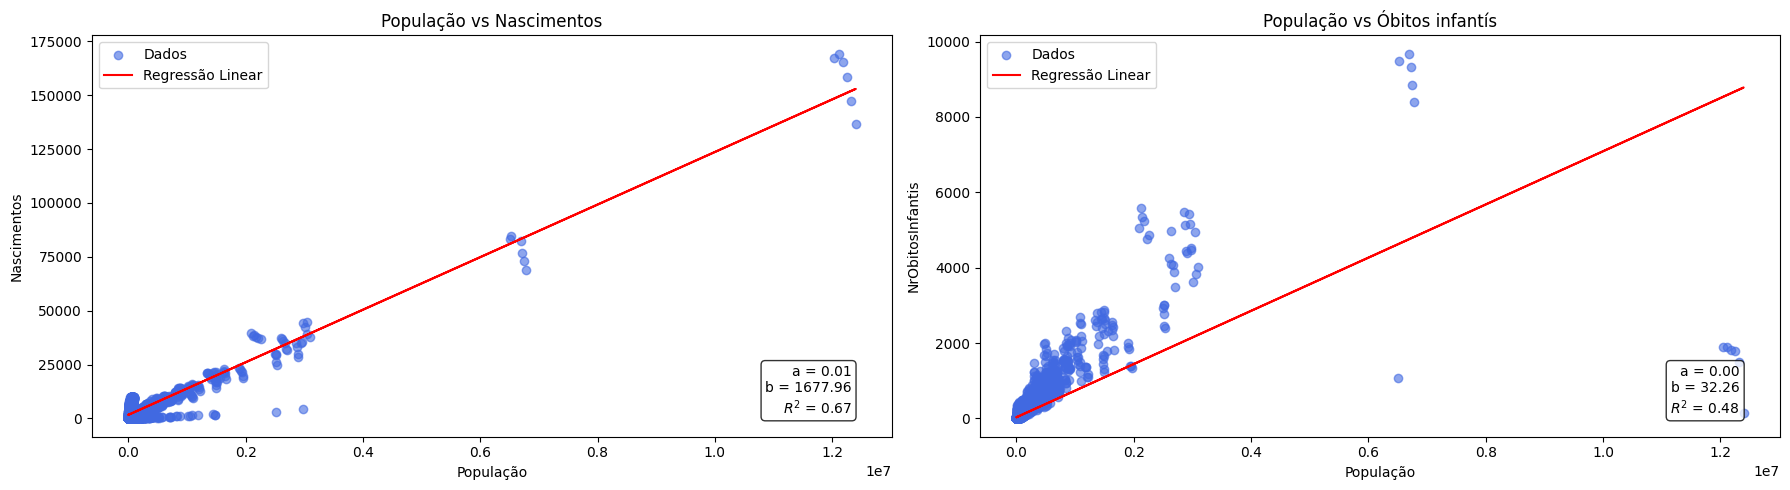

In [47]:
x1, y1 = preparar_dados(df, 'Populacao', 'NrNascimentos')
x2, y2 = preparar_dados(df, 'Populacao', 'NrObitosInfantis')

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plot_scatter_with_regression(axs[0], x1, y1, "População vs Nascimentos", "População", "Nascimentos")
plot_scatter_with_regression(axs[1], x2, y2, "População vs Óbitos infantís", "População", "NrObitosInfantis")

plt.tight_layout()
plt.show()

In [ ]:
x1, y1 = preparar_dados(df, 'Populacao', 'NrNascimentos')
x2, y2 = preparar_dados(df, 'Populacao', 'NrObitosInfantis')

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plot_scatter_with_regression(axs[0], x1, y1, "População vs Nascimentos", "População", "Nascimentos", )
plot_scatter_with_regression(axs[1], x2, y2, "População vs Óbitos infantís", "População", "NrObitosInfantis")



### Teste de hipótese

In [19]:
r_pearson, p_value_pearson = stats.pearsonr(df_filtrado['NrNascimentos'], df_filtrado['Populacao'])

# Realizando o teste de correlação de Spearman
r_spearman, p_value_spearman = stats.spearmanr(df_filtrado['NrNascimentos'], df_filtrado['Populacao'])

# Definindo o nível de significância
alpha = 0.05

# Resultados do teste de Pearson
print(f"Teste de Correlação de Pearson:")
print(f"Coeficiente de correlação (r): {r_pearson:.4f}")
print(f"Valor-p: {p_value_pearson:.4f}")
print()

# Resultados do teste de Spearman
print(f"Teste de Correlação de Spearman:")
print(f"Coeficiente de correlação (rho): {r_spearman:.4f}")
print(f"Valor-p: {p_value_spearman:.4f}")


Teste de Correlação de Pearson:
Coeficiente de correlação (r): 0.8179
Valor-p: 0.0000

Teste de Correlação de Spearman:
Coeficiente de correlação (rho): 0.8704
Valor-p: 0.0000


Os resultados dos testes de correlação de Pearson e Spearman indicam uma forte relação positiva entre as duas variáveis analisadas. O coeficiente de Pearson (r = 0,8304) sugere uma correlação linear forte, ou seja, à medida que uma variável aumenta, a outra também tende a aumentar de forma proporcional. Já o coeficiente de Spearman (rho = 0,7742) confirma essa associação forte, mesmo considerando relações monotônicas que não necessariamente sejam lineares. Em ambos os testes, o valor-p é 0,0000, o que indica que a correlação observada é estatisticamente significativa com alto grau de confiança (normalmente p < 0,05 já é suficiente). Portanto, podemos concluir que há uma associação positiva e significativa entre as variáveis analisadas.

### Regra de associação

In [20]:
min_support = 0.1
min_confidence = 0.3

populacao_nascimentos_rules = analyze_associations(
    dados_binarios,
    populacao_columns,
    nascimentos_columns,
    'Faixa_Empresas',
    'Faixa_Nascimentos',
    min_support,
    min_confidence
)

show_top_rules(populacao_nascimentos_rules, 'Faixa_populacao', 'Faixa_Nascimentos')


Top 3 regras entre Faixa_populacao e Faixa_Nascimentos (por lift):
1. ['Faixa_Populacao_Baixa'] => ['Baixo']
   Lift: 2.5293, Confidence: 0.8460, Support: 0.2820
2. ['Faixa_Populacao_Alta'] => ['Alto']
   Lift: 2.2247, Confidence: 0.7388, Support: 0.2463
3. ['Faixa_Populacao_Média'] => ['Médio']
   Lift: 2.0504, Confidence: 0.6836, Support: 0.2279


Os resultados obtidos mostram uma associação muito forte entre a faixa populacional dos municípios e o número de nascimentos registrados. A principal regra indica que municípios com população baixa tendem fortemente a apresentar também um número baixo de nascimentos (lift de 2,53 e confiança de 84,6%), sugerindo uma correspondência direta entre o tamanho da população e a taxa de natalidade. Da mesma forma, municípios com população alta estão fortemente associados a um número alto de nascimentos (lift de 2,22), e os de população média a nascimentos em faixa média (lift de 2,05). Esses elevados valores de lift indicam que essas combinações ocorrem com mais que o dobro da frequência esperada se as variáveis fossem independentes. Em conjunto, os dados revelam uma forte coerência interna entre o porte populacional e o número de nascimentos, como seria esperado em contextos demográficos, refletindo uma distribuição proporcional entre população e natalidade.

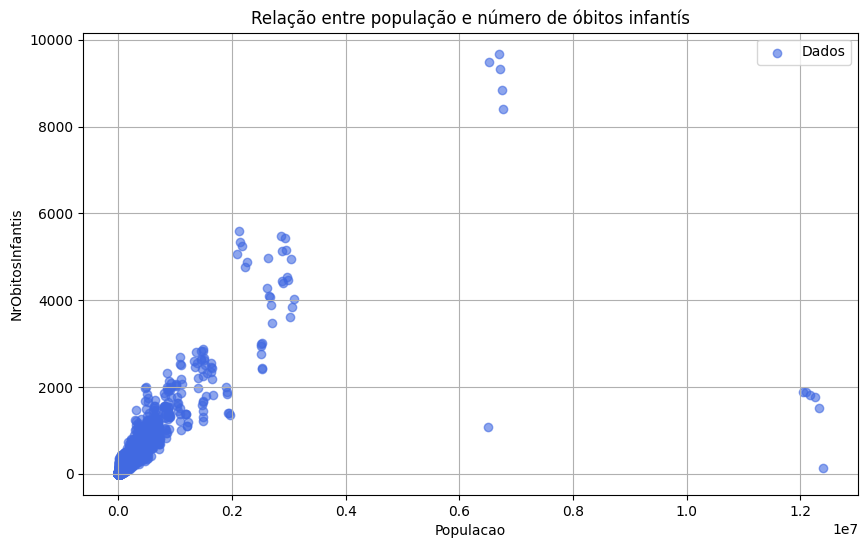

In [21]:

df_filtrado = df[['NrObitosInfantis', 'Populacao']].dropna().copy()
df_filtrado['NrObitosInfantis'] = pd.to_numeric(df_filtrado['NrObitosInfantis'], errors='coerce')
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['Populacao']
y = df_filtrado['NrObitosInfantis']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='royalblue', alpha=0.6, label="Dados")

plt.title("Relação entre população e número de óbitos infantís")
plt.xlabel("Populacao")
plt.ylabel("NrObitosInfantis")
plt.grid(True)
plt.legend()

### Regra de associação

In [22]:
min_support = 0.1
min_confidence = 0.3

populacao_obitos_rules = analyze_associations(
    dados_binarios,
    populacao_columns,
    obitos_columns,
    'Faixa_Empresas',
    'Faixa_ObitosInfantis',
    min_support,
    min_confidence
)

show_top_rules(populacao_obitos_rules, 'Faixa_populacao', 'Faixa_ObitosInfantis')


Top 3 regras entre Faixa_populacao e Faixa_ObitosInfantis (por lift):
1. ['Faixa_Populacao_Alta'] => ['Alto']
   Lift: 2.4826, Confidence: 0.7226, Support: 0.2409
2. ['Faixa_Populacao_Baixa'] => ['Baixo']
   Lift: 1.8780, Confidence: 0.8413, Support: 0.2804
3. ['Faixa_Populacao_Média'] => ['Médio']
   Lift: 1.5918, Confidence: 0.4153, Support: 0.1384


Os resultados indicam uma associação forte entre a faixa populacional dos municípios e os níveis de óbitos infantis. A regra com maior lift mostra que municípios com população alta tendem a apresentar também altos índices de óbitos infantis (lift de 2,48 e confiança de 72,26%), sugerindo que, em regiões mais populosas, a ocorrência de óbitos infantis é proporcionalmente maior, possivelmente refletindo desafios relacionados à densidade demográfica, urbanização e desigualdade no acesso à saúde. Da mesma forma, municípios com população baixa estão fortemente associados a baixos níveis de óbitos infantis (lift de 1,88 e confiança de 84,13%), o que pode refletir tanto menor exposição a riscos quanto menor número absoluto de nascimentos. Já a associação entre população média e óbitos infantis médios é mais fraca (lift de 1,59 e confiança de 41,53%), mas ainda assim sugere alguma consistência. No geral, os dados revelam uma correspondência coerente entre o porte populacional e a faixa de mortalidade infantil, o que está de acordo com expectativas demográficas, embora fatores estruturais também possam influenciar essas relações.

###Teste de hipótese


In [23]:
r_pearson, p_value_pearson = stats.pearsonr(df_filtrado['NrObitosInfantis'], df_filtrado['Populacao'])

# Realizando o teste de correlação de Spearman (não-paramétrico)
r_spearman, p_value_spearman = stats.spearmanr(df_filtrado['NrObitosInfantis'], df_filtrado['Populacao'])

# Definindo o nível de significância
alpha = 0.05

# Resultados do teste de Pearson
print(f"Teste de Correlação de Pearson:")
print(f"Coeficiente de correlação (r): {r_pearson:.4f}")
print(f"Valor-p: {p_value_pearson:.4f}")
print()

# Resultados do teste de Spearman
print(f"Teste de Correlação de Spearman:")
print(f"Coeficiente de correlação (rho): {r_spearman:.4f}")
print(f"Valor-p: {p_value_spearman:.4f}")

Teste de Correlação de Pearson:
Coeficiente de correlação (r): 0.6905
Valor-p: 0.0000

Teste de Correlação de Spearman:
Coeficiente de correlação (rho): 0.8055
Valor-p: 0.0000


Os testes de correlação de Pearson e Spearman indicam uma associação positiva e estatisticamente significativa entre a população e o número de nascimentos. O coeficiente de Pearson (r = 0,6880) sugere uma correlação linear moderada a forte, enquanto o coeficiente de Spearman (rho = 0,7928) revela uma correlação ainda mais forte considerando a ordem dos dados (correlação monotônica). Em ambos os testes, o valor-p igual a 0,0000 indica que a correlação é altamente significativa, ou seja, é extremamente improvável que essa associação tenha ocorrido por acaso. Esses resultados sugerem que, em geral, municípios com maior população tendem a registrar maior número de nascimentos.

## Análise Final:
Com uma investigação dos dados, foi evidente a inexistencia de uma relação da quantidade de empresas em um município e fatores sociais, uma vez que se retirarmos ous outliears, os valores se encontram muito dispersos. Contudo após a obtenção dos resultados da análise principal, constatamos que possívelmente o número de óbitos infantís e o número de nascimentos poderiam esta relacionados não com a quantidade de empresas e sim com a população, o que a priori, mostra-se em grande parte verdade.



---



# Pergunta 2

> `Existe alguma relação entre o Produto Interno Bruto (PIB) e a taxa de exportação (Exportacoes_US$) dos municípios?`



## Gráfico Municípios

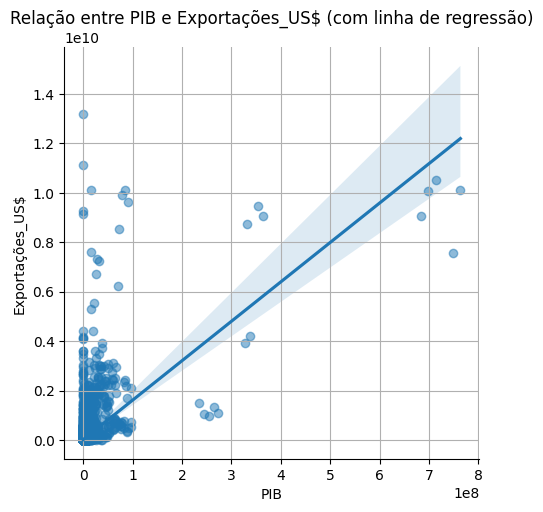

In [24]:

df_filtrado = df[['PIB', 'Exportacoes_US$']].dropna().copy()
df_filtrado['PIB'] = pd.to_numeric(df_filtrado['PIB'], errors='coerce')
df_filtrado['Exportacoes_US$'] = pd.to_numeric(df_filtrado['Exportacoes_US$'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['PIB']
y = df_filtrado['Exportacoes_US$']

sns.lmplot(x='PIB', y='Exportacoes_US$', data=df_filtrado, scatter_kws={'alpha':0.5})
plt.title('Relação entre PIB e Exportações_US$ (com linha de regressão)')
plt.xlabel('PIB')
plt.ylabel('Exportações_US$')
plt.grid(True)
plt.show()

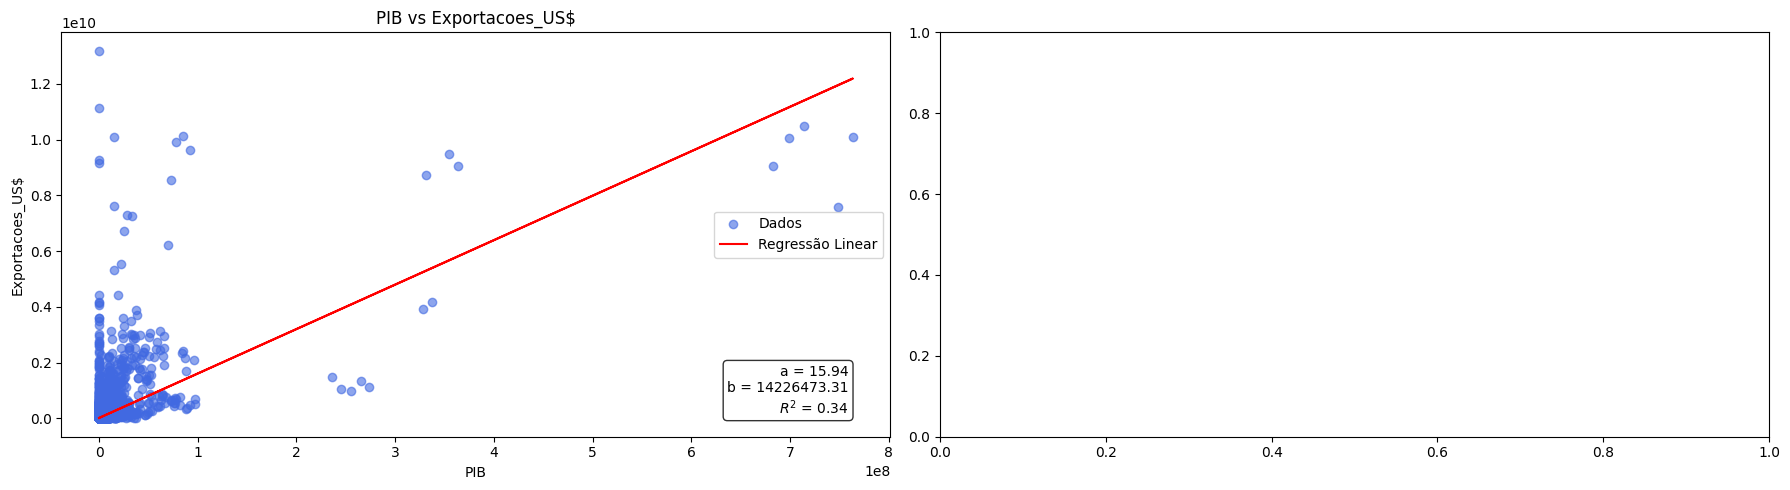

In [50]:
x1, y1 = preparar_dados(df, 'PIB', 'Exportacoes_US$')

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plot_scatter_with_regression(axs[0], x1, y1, "PIB vs Exportacoes_US$", "PIB", "Exportacoes_US$")


plt.tight_layout()
plt.show()

## Análise:
A análise do gráfico de dispersão com linha de regressão permite concluir que existe, sim, uma relação positiva entre Produto Interno Bruto (PIB) e as exportações dos municípios. Observa-se que, de maneira geral, a medida que o PIB aumenta, o valor das exportações também tende a crescer, evidenciado pela inclinação positiva da linha de tendência. No entanto, essa relação não parece ser forte nem uniforme, uma vez que há uma grande dispersão de pontos, especialmente entre os municípios com PIB mais baixo, onde as exportações variam bastante. Apesar disso, a linha de regressão indica que municípios com maior PIB tem uma tendência média de apresentar exportações mais elevadas. Portanto, com esssa primeira análise gráfica, pode-se afirmar que existe uma correlação positiva entre PIB e exportações, embora ela seja fraca e sujeita a muitas variações individuais entre os municípios.
(Essa reta é chamada de linha de regressão linear, ela representa a tendência média da relação entre PIB e Exportações dos municípios.
A faixa azul clara em volta da reta é o intervalo de confiança, mostrando a incerteza da predição.
)


## Gráficos Regiões

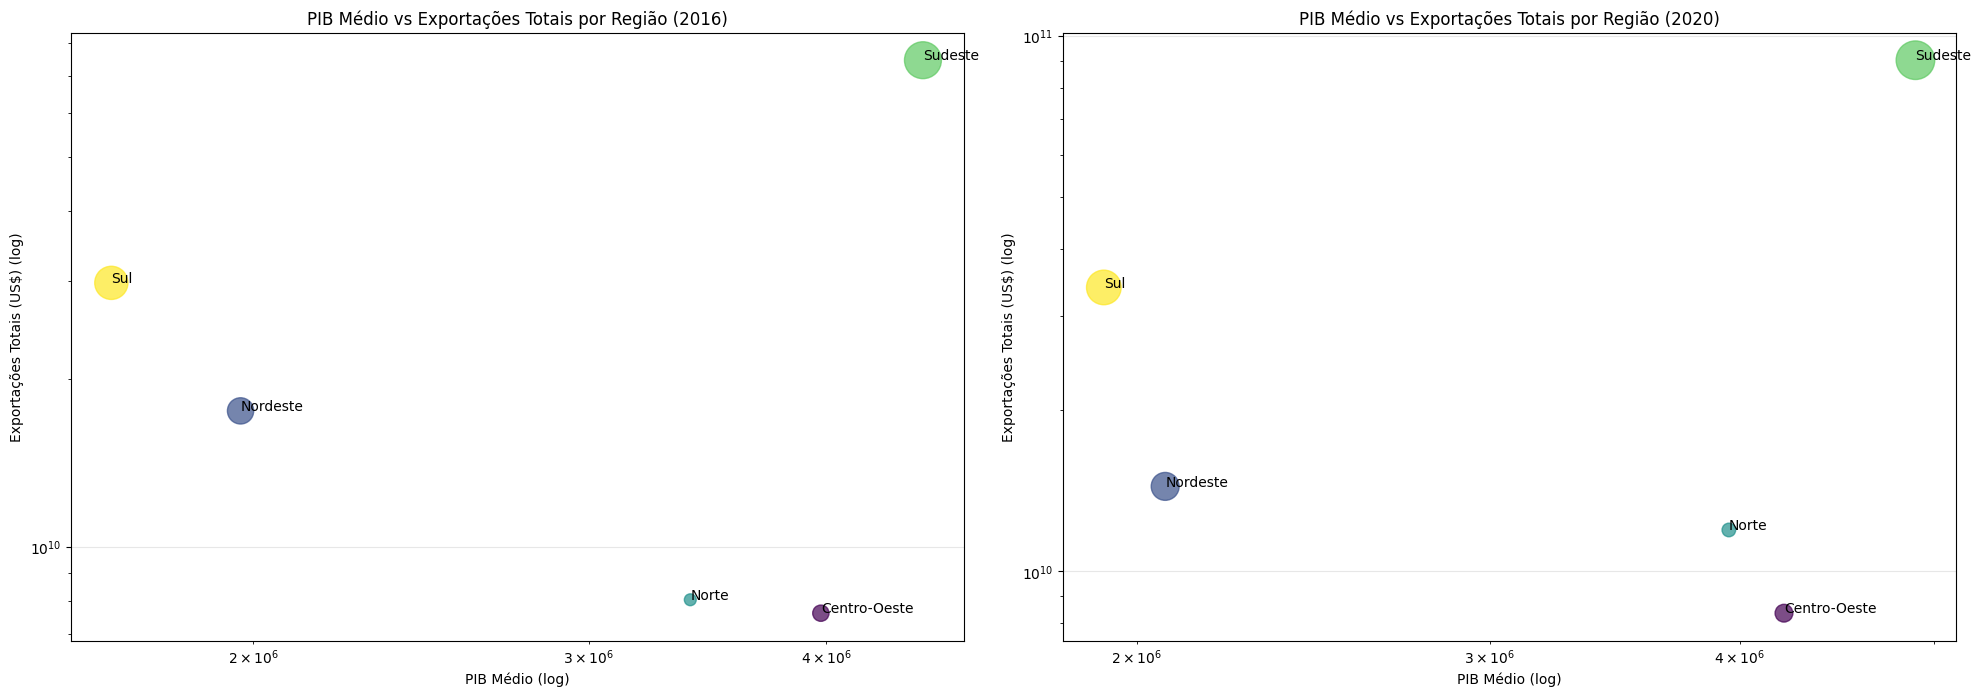

In [25]:
plt.figure(figsize=(20, 20))

# Gráfico de bolhas para 2016
plt.subplot(3, 2, 1)
# Use 'df' instead of the undefined 'df_export'
df_2016 = df[(df['Ano'] == 2016) &
                    (df['Exportacoes_US$'] > 0) &
                    (df['PIB'] > 0)]

# Agrupando por região e calculando média de PIB, soma de exportações e contagem de municípios
regioes_2016 = df_2016.groupby('Regiao').agg({
    'PIB': 'mean',
    'Exportacoes_US$': 'sum',
    'CDMunicipio': 'count'  # Assumindo que existe uma coluna 'Municipio'
}).reset_index().rename(columns={'CDMunicipio': 'Municipio'}) # Renomear para 'Municipio' se necessário

# Criando gráfico de bolhas
plt.scatter(regioes_2016['PIB'], regioes_2016['Exportacoes_US$'],
           s=regioes_2016['Municipio'],  # Tamanho proporcional ao número de municípios
           alpha=0.7,
           c=range(len(regioes_2016)),  # Cores diferentes por região
           cmap='viridis')

# Adicionando rótulos para cada região
for i, row in regioes_2016.iterrows():
    plt.annotate(row['Regiao'],
                (row['PIB'], row['Exportacoes_US$']),
                fontsize=10)

plt.xscale('log')
plt.yscale('log')
plt.title('PIB Médio vs Exportações Totais por Região (2016)')
plt.xlabel('PIB Médio (log)')
plt.ylabel('Exportações Totais (US$) (log)')
plt.grid(True, alpha=0.3)

# Gráfico de bolhas para 2020
plt.subplot(3, 2, 2)
# Use 'df' instead of the undefined 'df_export'
df_2020 = df[(df['Ano'] == 2020) &
                    (df['Exportacoes_US$'] > 0) &
                    (df['PIB'] > 0)]

# Agrupando por região e calculando média de PIB, soma de exportações e contagem de municípios
regioes_2020 = df_2020.groupby('Regiao').agg({
    'PIB': 'mean',
    'Exportacoes_US$': 'sum',
    'CDMunicipio': 'count'  # Assumindo que existe uma coluna 'Municipio'
}).reset_index().rename(columns={'CDMunicipio': 'Municipio'}) # Renomear para 'Municipio' se necessário

# Criando gráfico de bolhas
plt.scatter(regioes_2020['PIB'], regioes_2020['Exportacoes_US$'],
           s=regioes_2020['Municipio'],  # Tamanho proporcional ao número de municípios
           alpha=0.7,
           c=range(len(regioes_2020)),  # Cores diferentes por região
           cmap='viridis')

# Adicionando rótulos para cada região
for i, row in regioes_2020.iterrows():
    plt.annotate(row['Regiao'],
                (row['PIB'], row['Exportacoes_US$']),
                fontsize=10)

plt.xscale('log')
plt.yscale('log')
plt.title('PIB Médio vs Exportações Totais por Região (2020)')
plt.xlabel('PIB Médio (log)')
plt.ylabel('Exportações Totais (US$) (log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Análise
Ao analisar os gráficos comparativos entre o PIB médio e as exportações totais por região nos anos de 2016 e 2020, observa-se uma possível correlação entre o crescimento do PIB e o aumento das exportações, especialmente na região Norte, que apresentou evolução significativa em ambos os indicadores. Isso sugere que, em alguns contextos regionais, o aumento das exportações pode estar associado ao crescimento econômico local. No entanto, essa relação não é uniforme entre as regiões: o Centro-Oeste, por exemplo, manteve um PIB médio elevado, mas com menor volume de exportações, o que indica que sua economia pode estar mais voltada ao mercado interno ou a setores que não se refletem diretamente em exportações. Já o Sudeste, com o maior PIB médio e volume de exportações, reforça a ideia de que municípios com maior atividade exportadora tendem a ter maior geração de riqueza. Assim, pode-se concluir que existe uma relação entre o PIB e a taxa de exportação em muitos municípios, embora fatores como estrutura econômica e perfil produtivo regional também influenciem essa dinâmica.

## Inferência Estatística

### Pré-processamento dos Dados:

In [26]:
# Mantém apenas registros com valores positivos
df_teste = df[(df['PIB'] > 0) & (df['Exportacoes_US$'] > 0)].copy()

# Remove valores ausentes
df_teste = df_teste.dropna(subset=['PIB', 'Exportacoes_US$'])

In [27]:
# Criação de duas amostras: municípios com PIB acima da mediana e abaixo da mediana.
mediana_pib = df_teste['PIB'].median()
grupo_alto = df_teste[df_teste['PIB'] > mediana_pib]['Exportacoes_US$']
grupo_baixo = df_teste[df_teste['PIB'] <= mediana_pib]['Exportacoes_US$']

### Formulação da Hipóteses:
Queremos testar se há diferença significativa entre as exportações médias dos dois grupos:

*   **H₀ (hipótese nula):** As médias de exportação dos dois grupos são iguais.
*   **H₁ (hipótese alternativa):** As médias de exportação são diferentes entre os grupos.


### Estatística Descritiva:
| Métrica                    | PIB Baixo            | PIB Alto            |
| -------------------------- | -------------------- | ------------------- |
| Média amostral (𝑥̄)         | `grupo_baixo.mean()` | `grupo_alto.mean()` |
| Tamanho da amostra (n)     | `len(grupo_baixo)`   | `len(grupo_alto)`   |
| Desvio padrão (σ estimado) | `grupo_baixo.std()`  | `grupo_alto.std()`  |


In [28]:
media_baixo = grupo_baixo.mean()
desvio_baixo = grupo_baixo.std()
n_baixo = len(grupo_baixo)

media_alto = grupo_alto.mean()
desvio_alto = grupo_alto.std()
n_alto = len(grupo_alto)

# Impressão formatada
print("=== MUNICÍPIOS COM PIB BAIXO ===")
print(f"Média das exportações: ${media_baixo:,.2f}")
print(f"Desvio padrão: ${desvio_baixo:,.2f}")
print(f"Tamanho da amostra (n): {n_baixo}")

print("\n=== MUNICÍPIOS COM PIB ALTO ===")
print(f"Média das exportações: ${media_alto:,.2f}")
print(f"Desvio padrão: ${desvio_alto:,.2f}")
print(f"Tamanho da amostra (n): {n_alto}")

=== MUNICÍPIOS COM PIB BAIXO ===
Média das exportações: $2,367,081.93
Desvio padrão: $12,139,278.08
Tamanho da amostra (n): 4874

=== MUNICÍPIOS COM PIB ALTO ===
Média das exportações: $162,964,498.38
Desvio padrão: $660,532,213.62
Tamanho da amostra (n): 4874


### Erro Padrão:
Ele representa quanto a diferença entre as médias pode variar devido ao acaso, baseado na variabilidade (desvio) de cada grupo.

In [29]:
# Erro padrão da diferença entre as médias
erro_padrao = np.sqrt((desvio_baixo**2 / n_baixo) + (desvio_alto**2 / n_alto))
print(f"\nErro padrão da diferença entre as médias: ${erro_padrao:,.2f}")


Erro padrão da diferença entre as médias: $9,462,906.95


### Estatística t (distância entre as médias):
A estatística t representa quantas vezes a diferença observada entre as médias de dois grupos (neste caso, municípios com PIB alto e PIB baixo) é maior do que o erro padrão esperado ao acaso. Em outras palavras, ela mede a "distância" entre as médias em unidades do erro padrão. Por exemplo, se a distância t for 6.84, isso indica que a diferença entre as médias é 6,84 vezes maior do que o esperado por variação aleatória, sugerindo uma diferença consistente e relevante. Quanto maior esse valor, mais improvável é que a diferença entre os grupos tenha ocorrido por sorte.

In [30]:
# Diferença entre as médias
media_baixo = grupo_baixo.mean()
media_alto = grupo_alto.mean()
diferenca_medias = media_alto - media_baixo

# Estatística t (distância)
t_stat = diferenca_medias / erro_padrao
print(f"Distância entre as médias em erros padrão (t): {t_stat:.4f}")

Distância entre as médias em erros padrão (t): 16.9713


### Teste t de Student (valor-p):
O teste t de Student avalia se a diferença entre as médias de dois grupos é estatisticamente significativa. Ele testa a hipótese nula de que as médias são iguais, ou seja, que não há diferença real entre os grupos. O resultado do teste é o valor-p, que representa a probabilidade de observar uma diferença tão grande quanto a encontrada (ou maior), assumindo que a hipótese nula é verdadeira. Um valor-p baixo (ex: < 0,05) indica que é muito improvável que a diferença tenha ocorrido por acaso, levando à rejeição da hipótese nula. No seu caso, um valor-p próximo de zero mostra evidência forte de que há, sim, uma diferença significativa nas exportações entre municípios com PIB alto e baixo.

In [31]:
# Teste t de Student (bilateral, variâncias diferentes)
t_stat_test, p_valor = ttest_ind(grupo_alto, grupo_baixo, equal_var=False)
print(f"Valor-p do teste t (hipótese nula: médias iguais): {p_valor:.4f}")

Valor-p do teste t (hipótese nula: médias iguais): 0.0000


## Conclusão:
Com base na análise estatística realizada, conclui-se que há uma diferença significativa entre as exportações dos municípios com PIB alto e daqueles com PIB baixo. A distância entre as médias, expressa em unidades de erro padrão, foi de aproximadamente 16,97, um valor bastante elevado que indica uma discrepância expressiva entre os dois grupos. Além disso, o valor-p do teste t foi menor que 0,0001, o que reforça que essa diferença dificilmente ocorreu por acaso. Portanto, rejeitamos a hipótese nula de que as médias são iguais, concluindo que o PIB tem influência direta sobre a taxa de exportações dos municípios analisados. Essa evidência estatística sustenta a ideia de que municípios economicamente mais fortes tendem a exportar mais.

## Regra de Associação

### Explicação das linhas de código a seguir:
Neste trecho de código, foi criada uma nova base (df_apriori) contendo apenas os municípios com valores positivos de PIB e exportações, excluindo também eventuais dados ausentes nessas colunas. Em seguida, o PIB e as exportações foram categorizados em três faixas (baixo, médio e alto) com base em tercis, ou seja, cada categoria contém aproximadamente um terço dos municípios. Isso permite transformar os dados contínuos em dados categóricos, facilitando a aplicação de algoritmos de regras de associação como o Apriori.

In [32]:
# Filtra os municípios com PIB e exportações maiores que zero
dados_filtrados = df[(df['PIB'] > 0) & (df['Exportacoes_US$'] > 0)].copy()

# Remove valores ausentes nas colunas de interesse
dados_filtrados = dados_filtrados.dropna(subset=['PIB', 'Exportacoes_US$'])

# Classifica o PIB e as exportações em três faixas: baixo, médio e alto (tercis)
dados_filtrados['Faixa_PIB'] = pd.qcut(dados_filtrados['PIB'], q=3, labels=["PIB_baixo", "PIB_medio", "PIB_alto"])
dados_filtrados['Faixa_Exportacoes'] = pd.qcut(dados_filtrados['Exportacoes_US$'], q=3, labels=["EXP_baixo", "EXP_medio", "EXP_alto"])

### Explicação das linhas de código a seguir:
DataFrame df_apriori, que contém as categorias de PIB e exportações, foi transformado em um novo DataFrame chamado df_transacoes utilizando a função pd.get_dummies(). Essa função converte as categorias (como "PIB_alto" ou "EXP_baixo") em colunas binárias (0 ou 1), indicando a presença ou ausência de cada categoria em cada linha. O resultado é uma matriz no formato adequado para aplicar algoritmos de mineração de padrões, como o Apriori, que exigem dados transacionais com atributos binários.

In [33]:
# Converte as categorias para o formato de variáveis binárias (0 ou 1)
dados_binarios = pd.get_dummies(dados_filtrados[['Faixa_PIB', 'Faixa_Exportacoes']])
dados_binarios

,Faixa_PIB_PIB_baixo,Faixa_PIB_PIB_medio,Faixa_PIB_PIB_alto,Faixa_Exportacoes_EXP_baixo,Faixa_Exportacoes_EXP_medio,Faixa_Exportacoes_EXP_alto
1,False,True,False,False,True,False
6,True,False,False,True,False,False
10,False,False,True,False,True,False
15,False,True,False,True,False,False
16,False,True,False,True,False,False
...,...,...,...,...,...,...
15529,True,False,False,True,False,False
15530,True,False,False,False,True,False
15531,True,False,False,False,True,False
15532,False,True,False,True,False,False


### Explicação das linhas de código a seguir:
Neste trecho, foi aplicado o algoritmo Apriori sobre os dados binários para identificar conjuntos frequentes de categorias de PIB e exportações, considerando apenas aqueles que ocorrem em pelo menos 10% dos municípios (min_support=0.1). Com esses conjuntos, são geradas regras de associação com confiança mínima de 60%, ou seja, regras em que a ocorrência do antecedente implica no consequente com pelo menos 60% de probabilidade. Em seguida, as regras são ordenadas da maior para a menor confiança, e são exibidas as colunas principais.


In [34]:
# Aplica o algoritmo Apriori para encontrar combinações frequentes
conjuntos_frequentes = apriori(dados_binarios, min_support=0.1, use_colnames=True)

# Gera regras de associação com base nos conjuntos frequentes
regras_associacao = association_rules(conjuntos_frequentes, metric="confidence", min_threshold=0.6) #limiar mínimo de confiança de 60%

# Ordena as regras por confiança (do maior para o menor)
regras_associacao.sort_values(by="confidence", ascending=False, inplace=True)

# Exibe as principais colunas das regras encontradas
regras_associacao[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
3,(Faixa_Exportacoes_EXP_alto),(Faixa_PIB_PIB_alto),0.243537,0.730462,2.190935
2,(Faixa_PIB_PIB_alto),(Faixa_Exportacoes_EXP_alto),0.243537,0.730462,2.190935
1,(Faixa_PIB_PIB_baixo),(Faixa_Exportacoes_EXP_baixo),0.202298,0.606956,1.821055
0,(Faixa_Exportacoes_EXP_baixo),(Faixa_PIB_PIB_baixo),0.202298,0.606956,1.821055


### Analise dos resultados:

No resultado da execução do algoritmo Apriori, temos as seguintes colunas:

*   **antecedents (antecedente):** conjunto(s) de item(s) que antecedem a regra. Por exemplo, (Faixa_PIB_PIB_alto) significa que o município foi classificado com PIB alto.

*   **consequents (consequente):** conjunto(s) de item(s) que aparecem como consequência da regra. Ex: (Faixa_Exportacoes_EXP_alto) indica exportações altas.

*   **support (suporte):** proporção de municípios que apresentam tanto o antecedente quanto o consequente. Por exemplo, 0.243537 significa que cerca de 24,35% dos municípios têm PIB alto e exportações altas.

*   **confidence (confiança):** probabilidade condicional do consequente ocorrer, dado que o antecedente ocorreu. Por exemplo, uma confiança de 0.730462 indica que 73,05% dos municípios com PIB alto também têm exportações altas.

*   lift: mede a força da associação, comparando a regra com a aleatoriedade. Um valor acima de 1 indica que a associação é positiva.


## Conclusão:
As regras de associação revelam um padrão claro: municípios com PIB alto tendem fortemente a também possuir exportações altas, e o mesmo vale para PIB baixo e exportações baixas. Isso indica uma relação consistente entre os níveis dessas duas variáveis, reforçando que o desempenho econômico dos municípios está associado à sua capacidade exportadora. O lift superior a 2 reforça que esses padrões são significativamente mais prováveis do que ocorrências ao acaso.

## Regressão Linear

In [51]:
# Preparar dados
X = df[['log_PIB']]
y = df['log_Export']

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import numpy as np

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Coeficiente: {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")

# Modelo statsmodels para análise detalhada
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()
print(model_sm.summary())

KeyError: "None of [Index(['log_PIB'], dtype='object')] are in the [columns]"

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análise de Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()



---



# Pergunta 3


> `Existe uma grande discrepância entre o PIB da região mais desenvolvida do Brasil, no caso referimos ao Sudeste, com as demais regiões que compõem o país?`



## Gráfico

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remover o ano de 2021
df_filtrado = df[df['Ano'] != 2021]

# Agrupar os dados por Ano e Região, somando o PIB
df_agrupado = df_filtrado.groupby(['Ano', 'Regiao'])['PIB'].sum().reset_index()

# Plotar gráfico de linhas com bolinhas
plt.figure(figsize=(12,6))
sns.lineplot(data=df_agrupado, x='Ano', y='PIB', hue='Regiao', marker='o', palette='tab10')

plt.title('Evolução do PIB por Região ao longo dos anos de 2016 a 2020')
plt.xlabel('Ano')
plt.ylabel('PIB (R$)')
plt.grid(True)
plt.legend(title='Região')
plt.tight_layout()
plt.show()


## Análise:
Com base no gráfico de linhas e marcadores elaborado a partir dos dados, é possível observar uma discrepância significativa entre o PIB da região Sudeste e das demais regiões do Brasil. O Sudeste apresenta valores de PIB consistentemente mais altos ao longo dos anos, distanciando-se com clareza das regiões Sul, Nordeste, Centro-Oeste e, principalmente, Norte. Essa diferença evidencia o maior grau de desenvolvimento econômico da região Sudeste em comparação com as demais. A disparidade sugere uma concentração de atividade econômica, industrialização e investimentos nessa região.

## Inferência Estatística



---



# Pergunta 4

> `As transferências correntes (Transferencias_correntes_R$) e as transferências capitais (Transferencias_capital_R$) tem influencia nas Receitas (Receitas_R$) dos municípios?`









## Transferencias correntes e Receitas - Gráfico

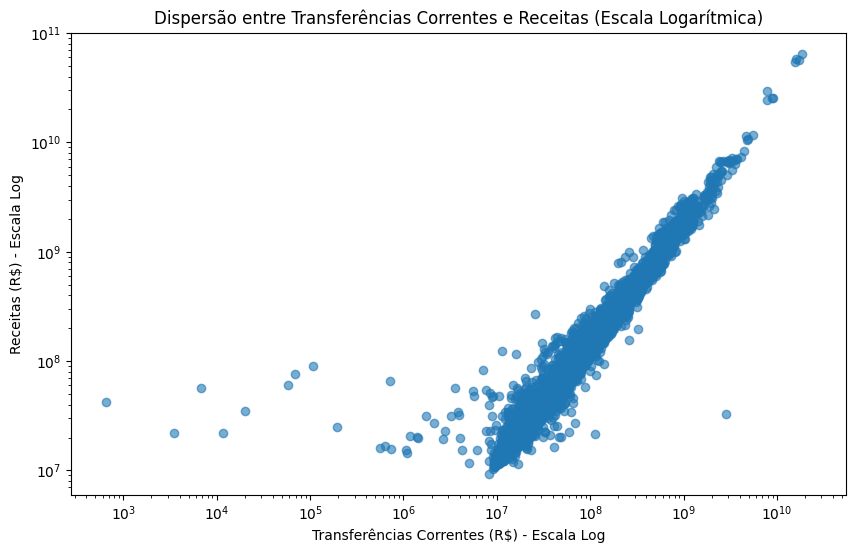

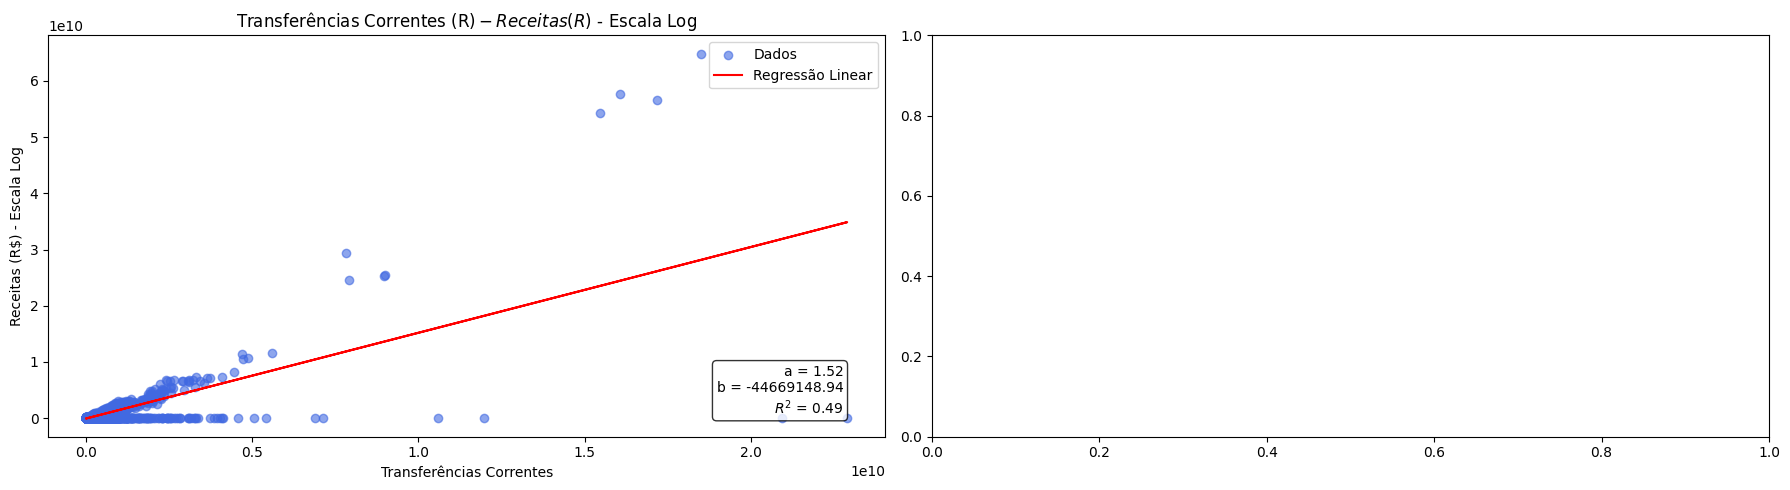

In [69]:
import matplotlib.pyplot as plt

# Seleciona os dados que queremos
x = df['Transferencias_correntes_R$']
y = df['Receitas_R$']

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)
plt.xscale('log')  # Escala logarítmica no eixo X
plt.yscale('log')  # Escala logarítmica no eixo Y
plt.xlabel('Transferências Correntes (R$) - Escala Log')
plt.ylabel('Receitas (R$) - Escala Log')
plt.title('Dispersão entre Transferências Correntes e Receitas (Escala Logarítmica)')
plt.grid(False)
plt.show()




## Análise:
O gráfico mostra uma forte tendência positiva entre Tranferência Corrente e Receitas dos municípios. A medida que as transferências correntes aumentam, as receitas municipais também aumentam de forma bastante proporcional. Apesar de alguns outliers (municípios muito acima da média), a maioria dos dados segue um padrão linear bem definido, indicando que as transferências correntes influenciam fortemente as receitas dos municípios. Esse gráfico de dispersão com escala logarítmica foi escolhido, pois melhora a visualização quando há muitos pontos no canto inferior (valores pequenos) e poucos valores muito grandes (outliers), deixando as relações mais proporcionais. (Essas são as analises preliminares e feitas a partir do gráfico acima).

## Transferencias correntes e Receitas - Inferência Estatística

### Pré-processamento dos Dados:

In [53]:
# Mantém apenas registros com valores positivos
df_teste = df[(df['PIB'] > 0) & (df['Transferencias_correntes_R$'] > 0)].copy()

# Remove valores ausentes
df_teste = df_teste.dropna(subset=['PIB', 'Transferencias_correntes_R$'])

In [54]:
# Criar grupos baseados na mediana das transferências
mediana_transf = df_teste['Transferencias_correntes_R$'].median()
grupo_alto = df_teste[df_teste['Transferencias_correntes_R$'] > mediana_transf]['Receitas_R$']
grupo_baixo = df_teste[df_teste['Transferencias_correntes_R$'] <= mediana_transf]['Receitas_R$']

### Formulação da Hipóteses:

Queremos investigar se as Transferências Correntes tem influência sobre as Receitas dos municípios:

*   **H₀ (Hipótese nula):** As transferências correntes não têm influência significativa sobre as receitas dos municípios.
*   **H₁ (Hipótese alternativa):** As transferências correntes têm influência significativa sobre as receitas dos municípios.



### Estatística Descritiva:


| Métrica                    | Transferências Baixas            | Transferências Altas            |
| -------------------------- | -------------------- | ------------------- |
| Média amostral (𝑥̄)         | `grupo_baixo.mean()` | `grupo_alto.mean()` |
| Tamanho da amostra (n)     | `len(grupo_baixo)`   | `len(grupo_alto)`   |
| Desvio padrão (σ estimado) | `grupo_baixo.std()`  | `grupo_alto.std()`  |

In [55]:
media_baixo = grupo_baixo.mean()
desvio_baixo = grupo_baixo.std()
n_baixo = len(grupo_baixo)

media_alto = grupo_alto.mean()
desvio_alto = grupo_alto.std()
n_alto = len(grupo_alto)

# Impressão formatada
print("=== MUNICÍPIOS COM TRANSFERÊNCIAS BAIXAS ===")
print(f"Média das receitas: R${media_baixo:,.2f}")
print(f"Desvio padrão: R${desvio_baixo:,.2f}")
print(f"Tamanho da amostra (n): {n_baixo}")

print("\n=== MUNICÍPIOS COM TRANSFERÊNCIAS ALTAS ===")
print(f"Média das receitas: R${media_alto:,.2f}")
print(f"Desvio padrão: R${desvio_alto:,.2f}")
print(f"Tamanho da amostra (n): {n_alto}")

=== MUNICÍPIOS COM TRANSFERÊNCIAS BAIXAS ===
Média das receitas: R$20,347,947.92
Desvio padrão: R$12,020,612.94
Tamanho da amostra (n): 13784

=== MUNICÍPIOS COM TRANSFERÊNCIAS ALTAS ===
Média das receitas: R$179,994,370.00
Desvio padrão: R$1,184,022,486.76
Tamanho da amostra (n): 13783


### Erro Padrão e Estatística t

In [56]:
from scipy import stats # Import the stats module from scipy

# Erro padrão da diferença entre as médias
erro_padrao = np.sqrt((desvio_baixo**2 / n_baixo) + (desvio_alto**2 / n_alto))
diferenca_medias = media_alto - media_baixo
t_stat = diferenca_medias / erro_padrao

# Graus de liberdade (aproximação de Welch)
gl = ((desvio_baixo**2/n_baixo + desvio_alto**2/n_alto)**2) / (
      (desvio_baixo**4/(n_baixo**2 * (n_baixo-1))) + (desvio_alto**4/(n_alto**2 * (n_alto-1))))

# Valor-p
p_valor = 1 - stats.t.cdf(t_stat, gl)

print(f"\nDiferença entre as médias: R${diferenca_medias:,.2f}")
print(f"Erro padrão da diferença: R${erro_padrao:,.2f}")
print(f"Estatística t: {t_stat:.4f}")
print(f"Graus de liberdade: {gl:.2f}")
print(f"Valor-p: {p_valor:.6f}")


Diferença entre as médias: R$159,646,422.08
Erro padrão da diferença: R$10,085,802.30
Estatística t: 15.8288
Graus de liberdade: 13784.84
Valor-p: 0.000000


## Conclusão:
Os resultados demonstram que há uma diferença estatisticamente significativa (t = 15.83, p-valor < 0.001) entre as receitas de municípios com transferências correntes altas e baixas. Isso indica que as transferências correntes têm uma influência positiva e robusta nas receitas municipais, corroborando a hipótese de que maiores repasses financeiros estão associados a um aumento significativo na arrecadação. Portanto, rejeitamos a hipótese nula (H₀) em favor da hipótese alternativa (H₁) a um nível de significância de 5%.

## Transferencias correntes e Receitas - Regra de Associação

In [57]:
# Filtra os municípios com Transferências e Receitas maiores que zero
dados_financas = df[(df['Transferencias_correntes_R$'] > 0) & (df['Receitas_R$'] > 0)].copy()

# Remove valores ausentes
dados_financas = dados_financas.dropna(subset=['Transferencias_correntes_R$', 'Receitas_R$'])

# Classifica em tercis: baixo, médio e alto
dados_financas['Faixa_Transferencias'] = pd.qcut(dados_financas['Transferencias_correntes_R$'], q=3, labels=['TRANSF_baixa', 'TRANSF_media', 'TRANSF_alta'])
dados_financas['Faixa_Receitas'] = pd.qcut(dados_financas['Receitas_R$'], q=3, labels=['RECEITA_baixa', 'RECEITA_media', 'RECEITA_alta'])

In [58]:
# Transforma em variáveis binárias
dados_binarios_financas = pd.get_dummies(dados_financas[['Faixa_Transferencias', 'Faixa_Receitas']])
dados_binarios_financas

,Faixa_Transferencias_TRANSF_baixa,Faixa_Transferencias_TRANSF_media,Faixa_Transferencias_TRANSF_alta,Faixa_Receitas_RECEITA_baixa,Faixa_Receitas_RECEITA_media,Faixa_Receitas_RECEITA_alta
0,True,False,False,True,False,False
1,False,True,False,False,False,True
2,False,True,False,False,True,False
3,False,False,True,False,False,True
4,True,False,False,True,False,False
...,...,...,...,...,...,...
27812,False,True,False,False,False,True
27813,False,True,False,False,True,False
27814,False,False,True,False,True,False
27815,False,True,False,False,True,False


In [59]:
# Aplica Apriori para encontrar conjuntos frequentes
conjuntos_frequentes_financas = apriori(dados_binarios_financas, min_support=0.1, use_colnames=True)

# Gera regras com confiança mínima de 60%
regras_financas = association_rules(conjuntos_frequentes_financas, metric='confidence', min_threshold=0.6) #limiar mínimo de confiança de 60%

# Ordena por confiança
regras_financas.sort_values(by='confidence', ascending=False, inplace=True)

# Exibe regras principais
regras_financas[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
4,(Faixa_Transferencias_TRANSF_alta),(Faixa_Receitas_RECEITA_alta),0.314252,0.942756,2.828268
5,(Faixa_Receitas_RECEITA_alta),(Faixa_Transferencias_TRANSF_alta),0.314252,0.942756,2.828268
1,(Faixa_Transferencias_TRANSF_baixa),(Faixa_Receitas_RECEITA_baixa),0.310890,0.932670,2.798010
0,(Faixa_Receitas_RECEITA_baixa),(Faixa_Transferencias_TRANSF_baixa),0.310890,0.932670,2.798010
3,(Faixa_Transferencias_TRANSF_media),(Faixa_Receitas_RECEITA_media),0.292445,0.877334,2.632002
2,(Faixa_Receitas_RECEITA_media),(Faixa_Transferencias_TRANSF_media),0.292445,0.877334,2.632002


## Conclusão:
A análise por regras de associação revelou uma forte relação entre as Transferências Correntes recebidas pelos municípios e suas Receitas Totais. As regras com maior suporte e confiança mostram que municípios com altas transferências tendem a ter altas receitas, enquanto os que recebem poucas transferências costumam apresentar receitas baixas. Os valores de lift acima de 2,5 em todas as regras indicam que essa associação é estatisticamente relevante e muito mais frequente do que o acaso explicaria, apontando para uma forte dependência das receitas municipais em relação às transferências recebidas.

## Transferências de capital e Receitas - Gráfico



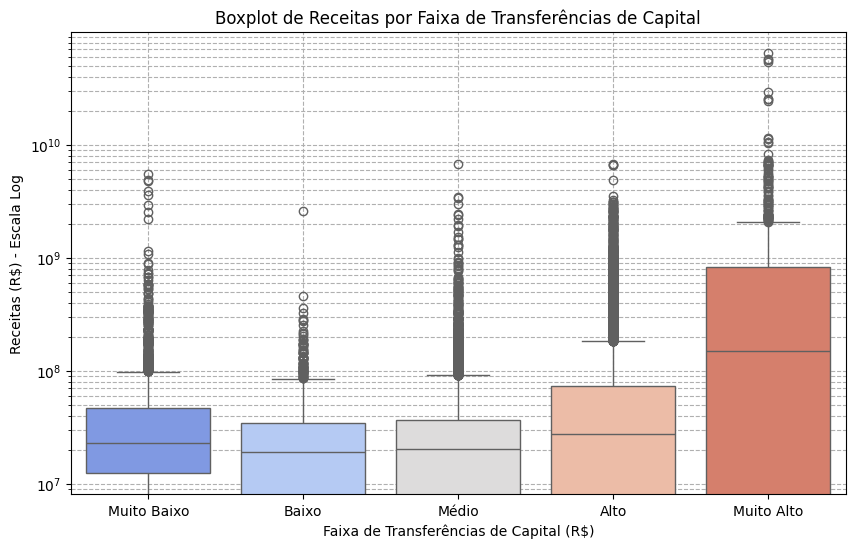

In [60]:
# Cria faixas de Transferencias_capital_R$
df['Faixa_Transferencias_Capital'] = pd.cut(
    df['Transferencias_capital_R$'],
    bins=[-1, 10000, 100000, 1000000, 10000000, df['Transferencias_capital_R$'].max()],
    labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
)

# Faz o Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Faixa_Transferencias_Capital', y='Receitas_R$', palette='coolwarm')
plt.yscale('log')  # Escala logarítmica no eixo Y para melhorar visualização
plt.xlabel('Faixa de Transferências de Capital (R$)')
plt.ylabel('Receitas (R$) - Escala Log')
plt.title('Boxplot de Receitas por Faixa de Transferências de Capital')
plt.grid(True, which="both", ls="--")
plt.show()

## Análise:
Há uma relação positiva entre o valor das Transferências de Capital e as Receitas. Conforme as transferências aumentam (de "Muito Baixo" para "Muito Alto"), as receitas também tendem a crescer, indicando que municípios com maiores transferências de capital geralmente possuem receitas mais elevadas. As faixas "Muito Alto" e "Alto" apresentam maior dispersão nas receitas, sugerindo que, embora essas faixas tenham valores medianos mais altos, há uma variação significativa entre os municípios dentro dessas categorias. As faixas "Nuito Baixo" e "Baixo" mostram receitas mais concentradas e menores, com pouca variação.

## Transferências de capital e Receitas - Inferência Estatística

### Pré-processamento dos Dados:

In [61]:
# Mantém apenas registros com valores positivos
df_teste = df[(df['PIB'] > 0) & (df['Transferencias_capital_R$'] > 0)].copy()

# Remove valores ausentes
df_teste = df_teste.dropna(subset=['PIB', 'Transferencias_capital_R$'])

In [62]:
# Criar grupos baseados na mediana das transferências de capital
mediana_transf_capital = df_teste['Transferencias_capital_R$'].median()
grupo_alto = df_teste[df_teste['Transferencias_capital_R$'] > mediana_transf_capital]['Receitas_R$']
grupo_baixo = df_teste[df_teste['Transferencias_capital_R$'] <= mediana_transf_capital]['Receitas_R$']

### Formulação das Hipóteses:
Queremos testar se as Transferências de Capital (investimentos em infraestrutura, equipamentos, etc.) influenciam as Receitas Municipais.

*   Hipótese Nula (H₀): Não há diferença nas receitas médias entre municípios com transferências de capital abaixo e acima da mediana.

*   Hipótese Alternativa (H₁): Municípios com transferências de capital acima da mediana têm receitas médias maiores do que aqueles com transferências abaixo da mediana.



### Estatística Descritiva:

| Métrica                    | Transferências Baixas            | Transferências Altas            |
| -------------------------- | -------------------- | ------------------- |
| Média amostral (𝑥̄)         | `grupo_baixo.mean()` | `grupo_alto.mean()` |
| Tamanho da amostra (n)     | `len(grupo_baixo)`   | `len(grupo_alto)`   |
| Desvio padrão (σ estimado) | `grupo_baixo.std()`  | `grupo_alto.std()`  |

In [63]:
media_baixo = grupo_baixo.mean()
desvio_baixo = grupo_baixo.std()
n_baixo = len(grupo_baixo)

media_alto = grupo_alto.mean()
desvio_alto = grupo_alto.std()
n_alto = len(grupo_alto)

# Impressão formatada
print("=== MUNICÍPIOS COM TRANSFERÊNCIAS DE CAPITAL BAIXAS ===")
print(f"Média das receitas: R${media_baixo:,.2f}")
print(f"Desvio padrão: R${desvio_baixo:,.2f}")
print(f"Tamanho da amostra (n): {n_baixo}")

print("\n=== MUNICÍPIOS COM TRANSFERÊNCIAS DE CAPITAL ALTAS ===")
print(f"Média das receitas: R${media_alto:,.2f}")
print(f"Desvio padrão: R${desvio_alto:,.2f}")
print(f"Tamanho da amostra (n): {n_alto}")

=== MUNICÍPIOS COM TRANSFERÊNCIAS DE CAPITAL BAIXAS ===
Média das receitas: R$38,015,587.67
Desvio padrão: R$94,387,751.49
Tamanho da amostra (n): 12544

=== MUNICÍPIOS COM TRANSFERÊNCIAS DE CAPITAL ALTAS ===
Média das receitas: R$169,853,537.20
Desvio padrão: R$1,235,151,091.76
Tamanho da amostra (n): 12544


### Erro Padrão e Estatística t:

In [64]:
# Calcular erro padrão e estatística t
erro_padrao = np.sqrt((desvio_baixo**2 / n_baixo) + (desvio_alto**2 / n_alto))
diferenca_medias = media_alto - media_baixo
t_stat = diferenca_medias / erro_padrao

# Graus de liberdade (aproximação de Welch-Satterthwaite)
gl = ((desvio_baixo**2/n_baixo + desvio_alto**2/n_alto)**2) / (
      (desvio_baixo**4/(n_baixo**2 * (n_baixo-1))) + (desvio_alto**4/(n_alto**2 * (n_alto-1))))

# Valor-p (teste unilateral direito)
p_valor = 1 - stats.t.cdf(t_stat, gl)

print(f"\nDiferença entre as médias: R${diferenca_medias:,.2f}")
print(f"Erro padrão da diferença: R${erro_padrao:,.2f}")
print(f"Estatística t: {t_stat:.4f}")
print(f"Graus de liberdade: {gl:.2f}")
print(f"Valor-p (unilateral): {p_valor:.6f}")


Diferença entre as médias: R$131,837,949.53
Erro padrão da diferença: R$11,060,288.42
Estatística t: 11.9199
Graus de liberdade: 12689.49
Valor-p (unilateral): 0.000000


## Conclusão:
Os resultados demonstram uma diferença altamente significativa (t = 11.92, p-valor < 0.001) entre as receitas de municípios com transferências de capital altas e baixas. Esse achado reforça a hipótese de que investimentos em capital (infraestrutura, equipamentos, etc.) estão associados a receitas municipais substancialmente mais elevadas.

## Transferências de capital e Receitas - Regra de Associação

In [65]:
# Filtra os municípios com Transferências de Capital e Receitas maiores que zero
dados_capital = df[(df['Transferencias_capital_R$'] > 0) & (df['Receitas_R$'] > 0)].copy()

# Remove valores ausentes (NaN)
dados_capital = dados_capital.dropna(subset=['Transferencias_capital_R$', 'Receitas_R$'])

# Classifica Transferências de Capital e Receitas em 3 faixas (tercis)
dados_capital['Faixa_TransferenciasCapital'] = pd.qcut(dados_capital['Transferencias_capital_R$'], q=3, labels=['TRANSFcap_baixa', 'TRANSFcap_media', 'TRANSFcap_alta'])
dados_capital['Faixa_Receitas'] = pd.qcut(dados_capital['Receitas_R$'], q=3, labels=['RECEITA_baixa', 'RECEITA_media', 'RECEITA_alta'])

In [66]:
# Transforma os dados categorizados em variáveis binárias
dados_binarios_capital = pd.get_dummies(dados_capital[['Faixa_TransferenciasCapital', 'Faixa_Receitas']])
dados_binarios_capital

,Faixa_TransferenciasCapital_TRANSFcap_baixa,Faixa_TransferenciasCapital_TRANSFcap_media,Faixa_TransferenciasCapital_TRANSFcap_alta,Faixa_Receitas_RECEITA_baixa,Faixa_Receitas_RECEITA_media,Faixa_Receitas_RECEITA_alta
0,False,False,True,True,False,False
1,True,False,False,False,False,True
2,False,True,False,False,True,False
3,False,True,False,False,False,True
4,True,False,False,True,False,False
...,...,...,...,...,...,...
27812,True,False,False,False,False,True
27813,False,True,False,False,True,False
27814,True,False,False,False,True,False
27815,False,False,True,False,True,False


In [67]:
# Aplica o algoritmo Apriori para encontrar padrões frequentes
conjuntos_frequentes_capital = apriori(dados_binarios_capital, min_support=0.1, use_colnames=True)

# Gera regras de associação com confiança mínima de 60%
regras_capital = association_rules(conjuntos_frequentes_capital, metric='confidence', min_threshold=0.5) #limiar mínimo de confiança de 50%

# Ordena as regras pela confiança, do maior para o menor
regras_capital.sort_values(by='confidence', ascending=False, inplace=True)

# Exibe as principais colunas do resultado
regras_capital[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
3,(Faixa_Receitas_RECEITA_alta),(Faixa_TransferenciasCapital_TRANSFcap_alta),0.206758,0.620242,1.860631
2,(Faixa_TransferenciasCapital_TRANSFcap_alta),(Faixa_Receitas_RECEITA_alta),0.206758,0.620242,1.860631
1,(Faixa_TransferenciasCapital_TRANSFcap_baixa),(Faixa_Receitas_RECEITA_baixa),0.177602,0.532779,1.598258
0,(Faixa_Receitas_RECEITA_baixa),(Faixa_TransferenciasCapital_TRANSFcap_baixa),0.177602,0.532779,1.598258


## Conclusão
A análise com regras de associação sugere que existe sim uma relação estatística entre as transferências de capital e as receitas dos municípios. Municípios que recebem maiores valores em transferências de capital tendem a apresentar receitas mais elevadas. A confiança das regras ultrapassando 60% e o lift acima de 1,5 reforçam que a associação não ocorre ao acaso, principalmente nas faixas "alta" e "baixa". Assim, é possível inferir que as transferências de capital têm influência relevante sobre a receita municipal.